# Topoplot

The [yasa.topoplot](https://raphaelvallat.com/yasa/build/html/generated/yasa.topoplot.html) function is a wrapper around [mne.viz.plot_topomap](https://mne.tools/stable/generated/mne.viz.plot_topomap.html) function.

In [1]:
import mne
import yasa
import numpy as np
import pandas as pd

## Simple example

Let's create a fake example: here, the values in ``bp`` represent relative NREM delta power, normalized from 0 to 1. The index of ``bp`` must be the channel names. Using the index, YASA will automatically infer the electrodes coordinates.

In [2]:
bp = pd.Series({
    "Fp1": 0.85, "Fp2": 0.83, 
    "F7": 0.74, "F3": 0.76, "Fz": 0.75, "F4": 0.79, "F8": 0.70,
    "T3": 0.50, "C3": 0.60, "Cz": 0.63, "C4": 0.65, "T4": 0.53,
    "T5": 0.25, "P3": 0.41, "Pz": 0.39, "P4": 0.45, "T6": 0.25,
    "O1": 0.15, "O2": 0.23,
}, name="Delta")

bp.head()

Fp1    0.85
Fp2    0.83
F7     0.74
F3     0.76
Fz     0.75
Name: Delta, dtype: float64

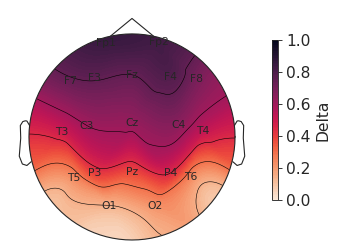

In [3]:
# The simplest example.
yasa.topoplot(bp, vmin=0, vmax=1);

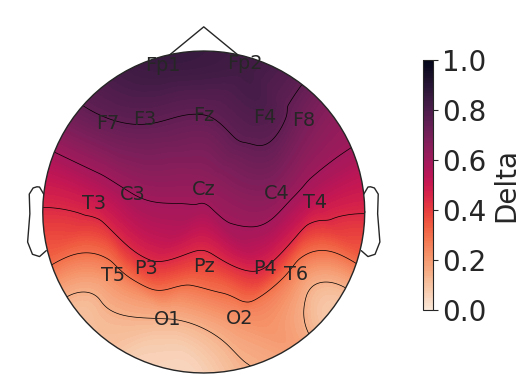

In [4]:
# We can change the size and resolution of the plot, as well as the font size
yasa.topoplot(bp, vmin=0, vmax=1, figsize=(5, 5), dpi=100, fontsize=20);

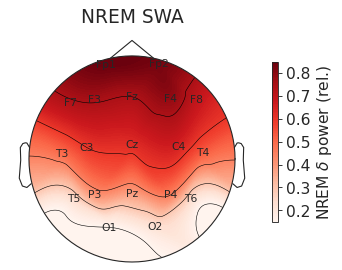

In [5]:
# Adding a title, changing the title of the colorbar, and changing the color palette
yasa.topoplot(bp, title="NREM SWA", cmap="Reds", cbar_title="NREM $\delta$ power (rel.)");

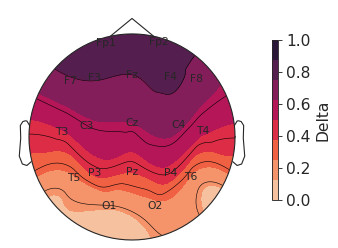

In [6]:
# Discretizing the colormap into 8 colors
yasa.topoplot(bp, vmin=0, vmax=1, n_colors=8);

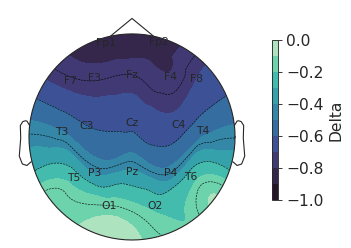

In [7]:
# When all values are negative, yasa uses a different default color palette
yasa.topoplot(-1 * bp, vmin=-1, vmax=0, n_colors=10);

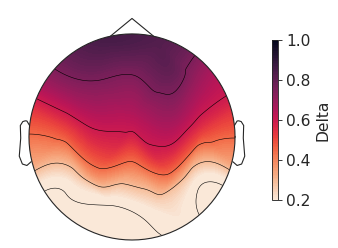

In [8]:
# Hide the channel names
yasa.topoplot(bp, vmin=0.2, vmax=1, show_names=False);

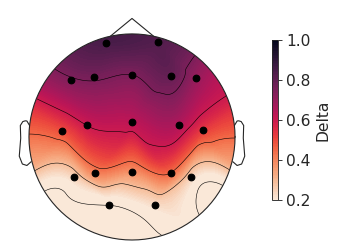

In [9]:
# Add marker instead
# ko means a black (k) circle (o)
yasa.topoplot(bp, vmin=0.2, vmax=1, show_names=False, sensors="ko");

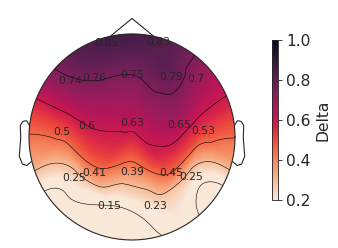

In [10]:
# Hidden feature: We can see the actual values using names="values"
yasa.topoplot(bp, vmin=0.2, vmax=1, names="values");

## Mask significant electrodes

In [11]:
# Second example: here the values represent correlation coefficients
corr = pd.DataFrame({
    "chan": ["Fp1", "Fp2", "F3", "Fz", "F4", "C3", "Cz", "C4", "P3", "Pz", "P4", "O1", "O2"],
    "r": [0.45, 0.301, 0.65, 0.67, 0.62, 0.57, 0.48, 0.52, -0.13, -0.05, -0.20, -0.31, -0.35],
    "pval": [0.10, 0.15, 0.005, 0.004, 0.01, 0.03, 0.10, 0.07, 0.76, 0.95, 0.63, 0.42, 0.37],
})

corr = corr.set_index("chan")

corr['sig'] = (corr['pval'] < 0.05)
corr.head(8)

,r,pval,sig
chan,,,
Fp1,0.450,0.100,False
Fp2,0.301,0.150,False
F3,0.650,0.005,True
Fz,0.670,0.004,True
F4,0.620,0.010,True
C3,0.570,0.030,True
Cz,0.480,0.100,False
C4,0.520,0.070,False


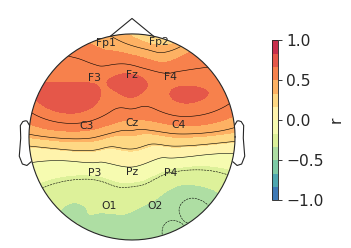

In [12]:
# Without masking
yasa.topoplot(corr['r'], vmin=-1, vmax=1, n_colors=12);

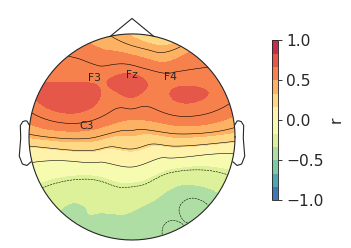

In [13]:
# Using a mask: only significant electrodes are shown
yasa.topoplot(corr['r'], vmin=-1, vmax=1, n_colors=12, mask=corr['sig']);